#Histogram Testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import itertools
%matplotlib inline

This notebook provides some simple tests for histograms I want to build using EBTEL-2fluid data, specifically the peak emission measure, the temperature at which this peak emission occurs, and the hot and cool shoulder slopes. 

The case we have is one where we vary some parameter $\beta$ and for each value of $\beta$, we have a resulting distribution. As a test case, consider a normal distribution where we vary the standard deviation, $\sigma$ and the mean $\mu$ using some variable $t$.

Let's first define a set of standard deviations and means and then build up a set of histograms for each value.

In [2]:
#set number of samples
num_samples=10000
#build the t vector that sigma and mu vary with
t = np.linspace(-2.0*np.pi,2.0*np.pi,100)
#set the sigma vector
sigma = np.sin(t) + 1.5
#set the mu vector
mu = np.sin(t)*np.cos(t)
#set the bin edges
bin_edges=np.linspace(-2.0,2.0,100)

In [3]:
sigma_var_dist = []
sigma_var = []
for s in sigma:
    #append values to list distributed according to normal distribution
    sigma_var.append(scs.norm.rvs(scale=s,size=num_samples))

In [4]:
mu_var_dist = []
mu_var = []
for m in mu:
    #append values to list distributed according to normal distribution
    mu_var.append(scs.norm.rvs(loc=m,size=num_samples))

Now, let's use these distributed values to build 2D histograms for 1. $\sigma=\sigma(t)$ and 2. $\mu=\mu(t)$. 

In [5]:
#flatten the mu and sigma variables
sigma_var_flat = list(itertools.chain(*sigma_var))
mu_var_flat = list(itertools.chain(*mu_var))
#flatten the t list
t_flat_sigma = []
for i in range(len(sigma)):
    [t_flat_sigma.append(t[i]) for j in range(len(sigma_var[i]))]
t_flat_mu = []
for i in range(len(mu)):
    [t_flat_mu.append(t[i]) for j in range(len(mu_var[i]))]
#build the bins for t
t_bins = np.append(t,t[-1]+np.fabs(t[0]-t[1])/100.0)

In [6]:
#build 2d histogram for varying sigma
hist_2d,xedge,yedge=np.histogram2d(t_flat_sigma,sigma_var_flat,bins=(t_bins,bin_edges))
#mask values with zero
hist_sigma_masked = np.ma.masked_where(hist_2d==0.0,hist_2d)

In [7]:
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

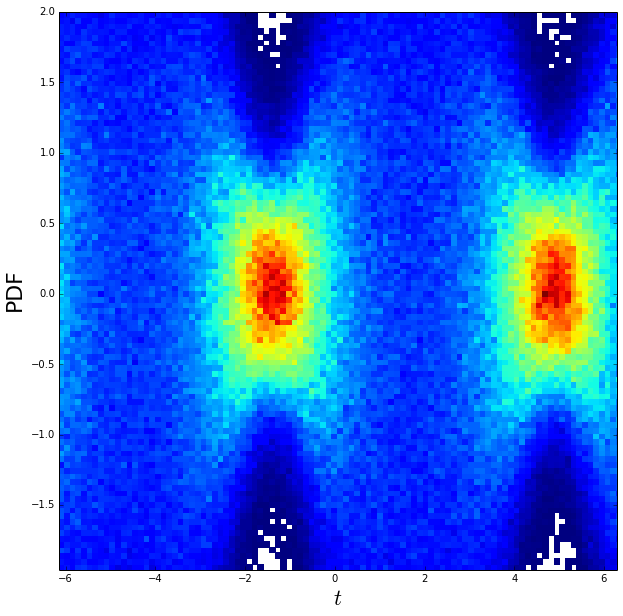

In [8]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_sigma_masked))
ax.set_xlabel(r'$t$',fontsize=22)
ax.set_ylabel(r'PDF',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()

In [9]:
#make 2D histogram
hist_2d,xedge,yedge=np.histogram2d(t_flat_mu,mu_var_flat,bins=(t_bins,bin_edges))
#mask zero entries
hist_mu_masked = np.ma.masked_where(hist_2d<=0.0,hist_2d)
#make the meshgrids
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

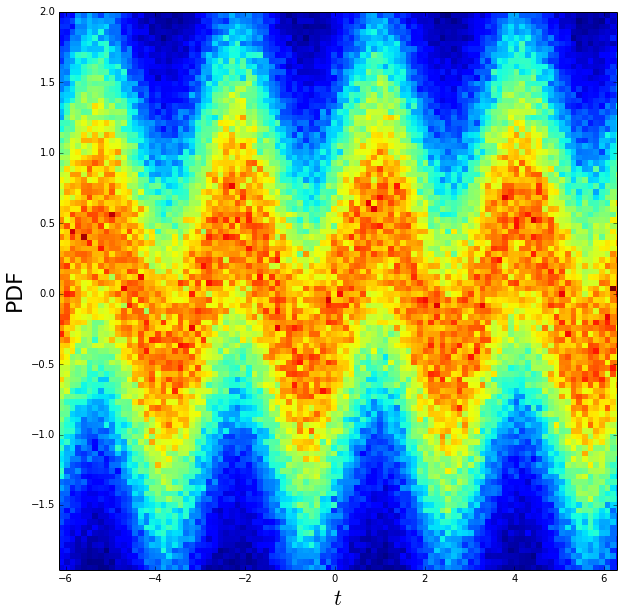

In [10]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_mu_masked))
ax.set_xlabel(r'$t$',fontsize=22)
ax.set_ylabel(r'PDF',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()

Thus, we can in principle do the same for our EM and $T_{max}$ values to show the resulting distributions for our different parameters at each value of the reheating time, $T_n$. For now, error bars seem to be sufficient.

##Testing with Actual Data

Now, we want to load a set of $T_{max}$ and $\mathrm{EM}_{max}$ calculations for the full $T_n$ range for a given $L$ and $\alpha$. 

In [11]:
#import tools for getting tmax and emmax data
import sys
sys.path.append('/home/wtb2/Documents/EBTEL-2fluid_repo/bin/')
import ebtel2fl_dem as ebd

In [12]:
dema = ebd.DEMAnalyzer('/data/datadrive2/EBTEL-2fluid_runs/','electron',1.5,20.0,100.0,'rka4',mc=True)
dema.process_raw()
dema.em_max()

Unable to process file for Tn = 250, run = 22
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 500, run = 38
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 750, run = 53
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1000, run = 69
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1250, run = 84
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1500, run = 100
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1750, run = 114
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2000, run = 129
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2250, run = 143
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2500

Now, we've loaded our data; we have two separate lists: one for $\mathrm{EM}_{max}$ and one for $T_{max}$. Each has 20 first level entries, corresponding to the 20 values of $T_n$. Then, each one of these 20 values has some number of entries corresponding to the number of runs executed per $T_n$ value. This is analogous to our above test case. Let's build our 2D histograms for each of these measurements.

In [14]:
#flatten the em_max and t_max variables
em_max_flat = list(itertools.chain(*dema.em_max))
temp_max_flat = list(itertools.chain(*dema.temp_max))
#flatten the tn list
tn_flat = []
for i in range(len(dema.Tn)):
    [tn_flat.append(dema.Tn[i]) for j in range(len(dema.em_max[i]))]
#build the bins for tn
tn_bins = np.append(dema.Tn,dema.Tn[-1]+np.fabs(dema.Tn[0]-dema.Tn[1])/100.0)

In [39]:
#make bin edges for em_max
bin_edges_em_max = np.linspace(26.0,30.0,100)
#make bin edges for temp_max
bin_edges_t_max = np.linspace(5.0,7.0,100)

In [40]:
#build 2d histogram for varying em_max
hist_2d,xedge,yedge=np.histogram2d(tn_flat,em_max_flat,bins=(tn_bins,bin_edges_em_max))
#mask values with zero
hist_em_max_masked = np.ma.masked_where(hist_2d==0.0,hist_2d)

In [41]:
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

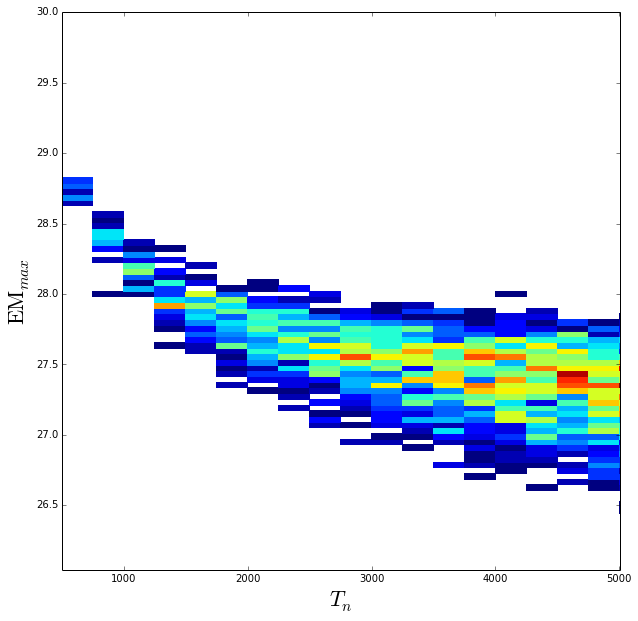

In [42]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_em_max_masked))
ax.set_ylabel(r'$\mathrm{EM}_{max}$',fontsize=22)
ax.set_xlabel(r'$T_n$',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()

In [43]:
#build 2d histogram for varying em_max
hist_2d,xedge,yedge=np.histogram2d(tn_flat,temp_max_flat,bins=(tn_bins,bin_edges_t_max))
#mask values with zero
hist_t_max_masked = np.ma.masked_where(hist_2d==0.0,hist_2d)

In [44]:
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

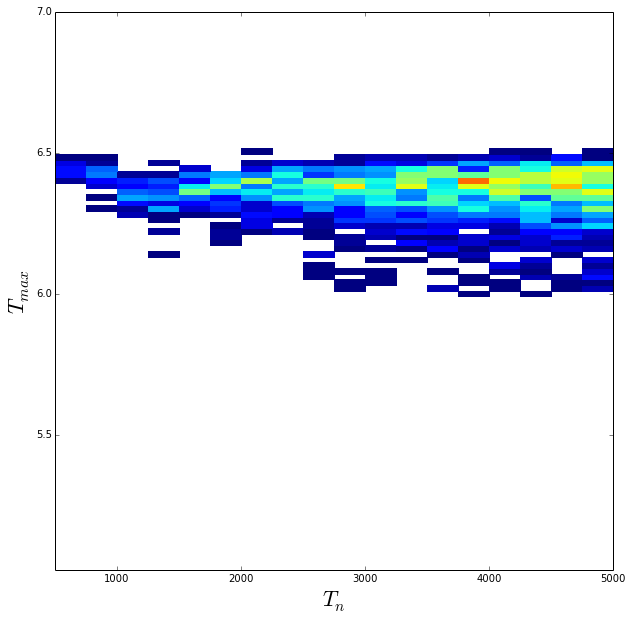

In [45]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_t_max_masked))
ax.set_ylabel(r'$T_{max}$',fontsize=22)
ax.set_xlabel(r'$T_n$',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()